In [1]:
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm
import matplotlib.pyplot as plt
import multiprocessing
from scipy import integrate
import pandas as pd

In [2]:
preds_samp = np.load('mc_preds.npy')

In [3]:
mc_pred = preds_samp.reshape(preds_samp.shape[0]*preds_samp.shape[1])

In [6]:
kde = sm.nonparametric.KDEUnivariate(mc_pred)
kde.fit() # Estimate the densities
support_mc = kde.support
endog = kde.endog
density_mc = kde.density

In [7]:
# read in val data
true_y = np.load('../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/labels_val.npy')

density_path = '../../../data/commaai/density/gaussian_density_filtered.csv'
density = pd.read_csv(density_path)

In [8]:
# estimate density 
kde = sm.nonparametric.KDEUnivariate(true_y)
kde.fit()
support = kde.support
endog = kde.endog
density_gauss = kde.density

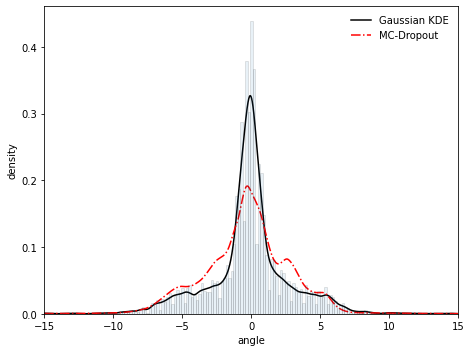

In [9]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.plot(support, density_gauss, color = 'black', label = 'Gaussian KDE')
ax.hist(true_y, bins=500, density=True,
        zorder=5, edgecolor='k', alpha=0.1)
ax.plot(support_mc, density_mc, color = 'red', linestyle= '-.', label = 'MC-Dropout')
#ax.plot(grid, va_ridge_av_den, color = 'orange', label = 'HMC/VA Ridge')
#ax.plot(grid, hmc_ridge['av_density'], color = 'orange', label = 'HMC Ridge', linestyle = '-.')
#ax.plot(grid, hmc_horse_av_den, color = 'green', linestyle= '--', label = 'HMC Horseshoe')
ax.set_xlim(-15,15)
ax.legend()
plt.legend(framealpha=0.0)
plt.xlabel('angle')
plt.ylabel('density')
fig.tight_layout(rect=[0.05, 0, 1, 1])